In [6]:
import matplotlib
import pylab
import matplotlib.pyplot as plt
import matplotlib
import h5py
import numpy as np
import os
import os.path
from readStep import *
%matplotlib inline

In [38]:
#specify inout parameters here
gamma=5.0/3.0
g=1.0
Lz=3.2
waveLen = 0.4
Ly = waveLen
showPerct = False
#####input done

In [50]:
###calculate some parameters
dz=dy=dx=Lz/nz

if nx == 1:
    dx=1.0
    
horizon_lim = (0, Ly-dy)
vert_lim = (0, Lz-dz)
extent=horizon_lim+vert_lim

FieldPoint = h5file.get('Fields').values()
totalsteps, specout = get_LatestTime(FieldPoint)

step = []
for i in range(totalsteps//specout):
    step.append(str((i+1)*specout).zfill(6))
step.insert(0,'000001')

In [52]:
ie = np.zeros(len(step))
ke = np.zeros(len(step))
pe = np.zeros(len(step))
me = np.zeros(len(step))
me = np.zeros(len(step))
te = np.zeros(len(step))

In [70]:
#calculate mixing layer width
seq = 0
for istep in step:
    mylist = ['Fields/','Prho','/',istep]
    filepath = delimiter.join(mylist)
    databk = h5file.get(filepath)
    rho = np.array(databk)
    for i in range(nz):
        #potential energy
        pe[seq] = pe[seq] + np.sum(rho[i, :, :] * g * i * dz)
        
    #kinetic energy
    mylist = ['Fields/','PVx','/',istep]
    filepath = delimiter.join(mylist)
    databk = h5file.get(filepath)
    vx = np.array(databk)
    mylist = ['Fields/','PVy','/',istep]
    filepath = delimiter.join(mylist)
    databk = h5file.get(filepath)
    vy = np.array(databk)
    mylist = ['Fields/','PVz','/',istep]
    filepath = delimiter.join(mylist)
    databk = h5file.get(filepath)
    vz = np.array(databk)
    ke[seq] = 0.5 * np.sum((vx**2 + vy**2 + vz**2) * rho)*dx*dy*dz
    
    #internal energy
    mylist = ['Fields/','PPress','/',istep]
    filepath = delimiter.join(mylist)
    databk = h5file.get(filepath)
    press = np.array(databk)
    ie[seq] =np.sum((1/(gamma-1))*press)*dx*dy*dz
              
  
    #magnetic energy
    mylist = ['Fields/','PBx','/',istep]
    filepath = delimiter.join(mylist)
    databk = h5file.get(filepath)
    vx = np.array(databk)
    mylist = ['Fields/','PBy','/',istep]
    filepath = delimiter.join(mylist)
    databk = h5file.get(filepath)
    vy = np.array(databk)
    mylist = ['Fields/','PBz','/',istep]
    filepath = delimiter.join(mylist)
    databk = h5file.get(filepath)
    vz = np.array(databk)
    me[seq] = 0.5 * np.sum((vx**2 + vy**2 + vz**2))*dx*dy*dz
    
    seq += 1
#total energy          
te = me + ie + ke
pe = pe*dx*dy*dz

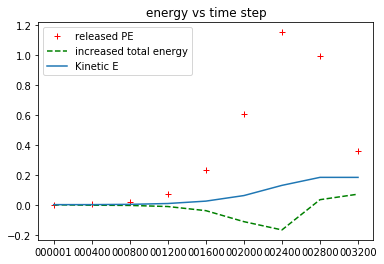

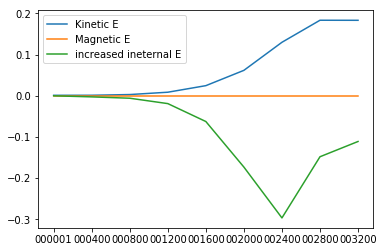

In [75]:
plt.plot(np.asarray(step),pe[0]-pe,'r+',label='released PE')
plt.plot(np.asarray(step),te-te[0],'g--', label='increased total energy')
plt.plot(np.asarray(step),ke, label='Kinetic E')
plt.title('energy vs time step')
pylab.legend(loc='best')
plt.show()
plt.plot(np.asarray(step),ke, label='Kinetic E')
plt.plot(np.asarray(step),me, label='Magnetic E')
plt.plot(np.asarray(step),ie - ie[0], label='increased ineternal E')
pylab.legend(loc='best')
plt.show()

In [72]:
ie

array([29.7704137 , 29.76777853, 29.76452245, 29.75144528, 29.70794139,
       29.59728951, 29.47386471, 29.62239831, 29.65946749])